In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [3]:
df_assn = pd.read_csv('/Users/rbiswa03/Downloads/Topic_Survey_Assignment.csv',index_col=0)
#,index_col=0
print('Data downloaded and read into a dataframe!')
print('shape of the data is', df_assn.shape)

Data downloaded and read into a dataframe!
shape of the data is (6, 3)


In [5]:
df_assn.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [6]:
#import pandas as pd
#dfsort = df_assn.sort_values(['Very interested'], ascending=[False])
#dfsort.head()

In [7]:
#prep the data
df = df_assn.sort_values('Very interested', ascending=False)
#print(df.head())
total_respondants = 2233
dfpercent = df / total_respondants * 100
dfpercent.round(3)

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.593,19.884,2.687
Machine Learning,72.951,21.361,3.314
Data Visualization,60.009,32.871,4.568
Big Data (Spark / Hadoop),59.651,32.647,5.687
Deep Learning,56.561,34.483,6.090
Data Journalism,19.212,48.410,27.318


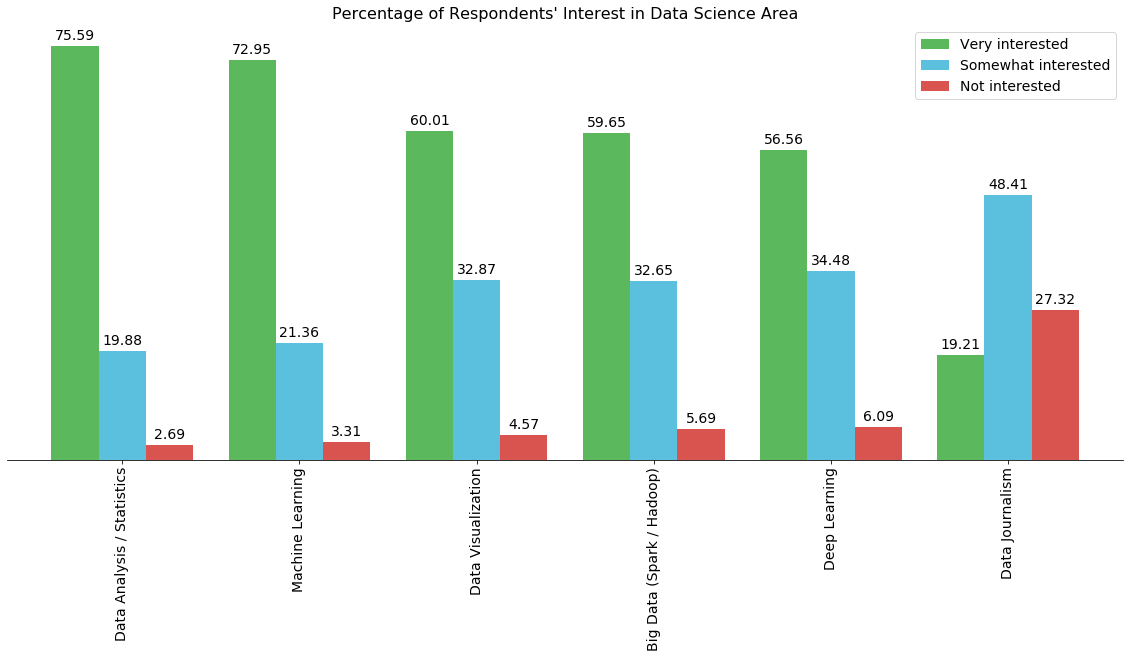

In [20]:
#create the plot
per = dfpercent.plot(kind='bar', 
            figsize=(20, 8), 
            width=0.8, 
            color=['#5cb85c', '#5bc0de', '#d9534f'],
           )

per.set_title("Percentage of Respondents' Interest in Data Science Area", fontsize=16)
per.spines['left'].set_visible(False)
per.spines['top'].set_visible(False)
per.spines['right'].set_visible(False)
per.axes.get_yaxis().set_visible(False)
per.tick_params(labelsize=14)
per.legend(fontsize=14)
for p in per.patches:
    per.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

In [10]:
df1=pd.read_csv('/Users/rbiswa03/Downloads/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df1.drop(['Category','Descript','DayOfWeek','Date','Time','Resolution','Address','X','Y','Location','PdId'], 
         axis=1, inplace=True)
df1.rename(columns={'IncidntNum':'Count', 'PdDistrict':'Neighborhood'}, inplace=True)
df1.columns=list(map(str,df1.columns))
df1.set_index('Neighborhood',inplace=True)

df1.sort_values('Count',ascending=False)
df1=df1.groupby('Neighborhood').count()
df1.reset_index(inplace=True)
df1

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [11]:
import json
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: failed with current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: //anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-3.2.0               |           py37_0         773 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    certifi-2019.6.16          |           py37_0         148 KB  conda-forge
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    llvm-openmp-4.0.1          |       hcfea43d_1         4

In [31]:
#san-francisco.geojson
#import folium and set coordinates
#import folium
gjson = r'/Users/rbiswa03/Downloads/map.geojson'
sf_map = folium.Map(location = [27.09, -81.48], zoom_start = 4)

#import json  27.095556
#!conda install -c conda-forge folium=0.5.0 --yes
#import folium
#print('Folium installed and imported!')
#from folium import plugins
#!wget --quiet https://cocl.us/sanfran_geojson -O world_countries.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [32]:
#sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [33]:
#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=df1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
sf_map

In [17]:
# import package and its set of stopwords
!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Comparing specs that have this dependency:   0%|          | 0/2 [00:00<?, ?it/s]

Finding conflict paths:   0%|                             | 0/1 [00:00<?, ?it/s]

Finding shortest conflict path for setuptools:   0%|      | 0/1 [00:00<?, ?it/s]\ 

                                                                                
Comparing specs that have this dependency:  50%|█ | 1/2 [00:30<00:30, 30.02s/it]

Finding conflict paths:   0%|                             | 0/1 [00:00<?, ?it/s]

Finding shortest conflict path for setuptools:   0%|      | 0/1 [00:00<?, ?it/s]| 

                                                                                
Comparing specs that have this dependen

ModuleNotFoundError: No module named 'wordcloud'

In [300]:
alice_novel = open.Document('/Users/⁨rbiswa03⁩/⁨Desktop⁩/⁨CV_Cover_Letter_Application/Rajesh_K_Biswas_12sep19.docx', 'r').read()

AttributeError: 'builtin_function_or_method' object has no attribute 'Document'

In [182]:
df_can.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [183]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

KeyError: 'Continent'

In [139]:
df_can.columns.tolist()
df_can.index.tolist()

print (type(df_can.columns.tolist()))
print (type(df_can.index.tolist()))

<type 'list'>
<type 'list'>


In [140]:
# size of dataframe (rows, columns)
df_can.shape

(27, 38)

In [141]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AVG'], axis=1, inplace=True)
df_can.head(2)

ValueError: labels ['AVG'] not contained in axis

In [142]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([     u'Type',  u'Coverage', u'Continent',    u'Region',         1980,
               1981,         1982,         1983,         1984,         1985,
               1986,         1987,         1988,         1989,         1990,
               1991,         1992,         1993,         1994,         1995,
               1996,         1997,         1998,         1999,         2000,
               2001,         2002,         2003,         2004,         2005,
               2006,         2007,         2008,         2009,         2010,
               2011,         2012,         2013],
      dtype='object')

In [145]:
df_can['Total'] = df_can.sum(axis=1)

In [146]:
df_can.isnull().sum()

Type          0
Coverage      0
Continent     0
Region        4
1980          0
1981          0
1982          0
1983          0
1984          0
1985          0
1986          0
1987          0
1988          0
1989          0
1990          0
1991          0
1992          0
1993          0
1994          0
1995          0
1996          0
1997          0
1998          0
1999          0
2000          0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
2013         27
Total         0
dtype: int64

In [147]:
df_can.describe()

,1993,1995,1996,2012,2013,Total
count,27.000000,27.000000,27.000000,27.000000,0.0,27.000000
mean,16077.555556,13665.481481,14559.333333,18624.925926,NaN,125854.592593
std,22558.381551,20431.329746,22833.075875,30820.141993,NaN,188318.983278
min,1.000000,1.000000,1.000000,1.000000,NaN,10.000000
25%,1442.000000,1176.000000,1202.000000,2126.500000,NaN,12631.000000
50%,7435.000000,6158.000000,5962.000000,8846.000000,NaN,58750.000000
75%,16550.000000,16766.000000,16772.000000,21313.000000,NaN,182505.000000
max,98737.000000,90424.000000,103030.000000,152218.000000,NaN,888818.000000


In [148]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [149]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

('Matplotlib version: ', '2.1.0')


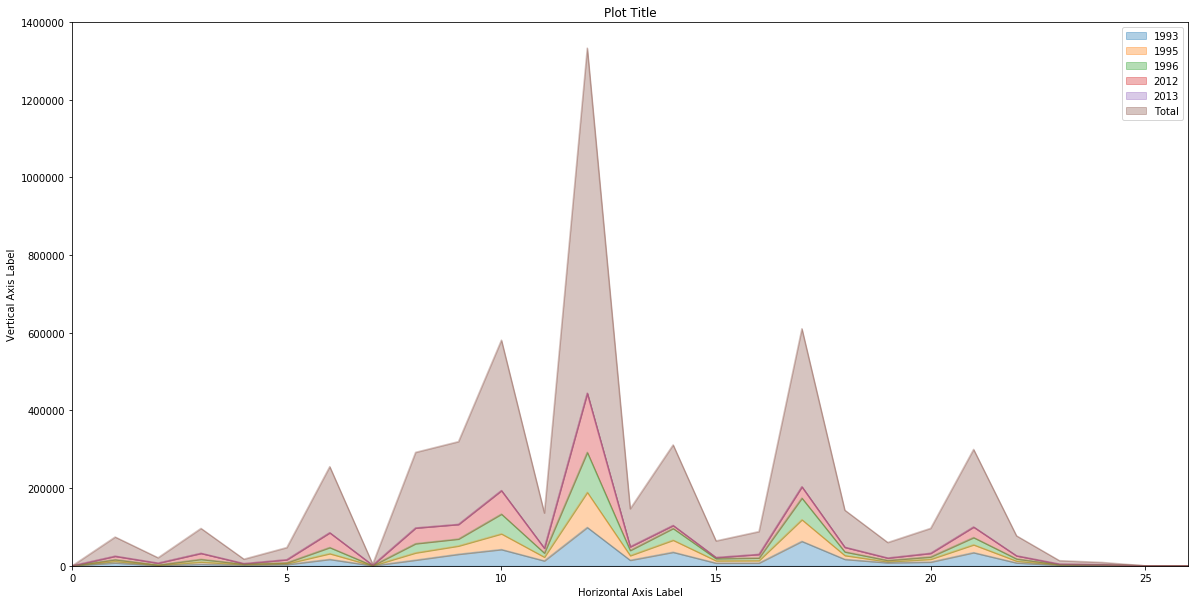

In [150]:
import matplotlib.pyplot as plt

transparency = 0.35 
df_can.plot(kind='area', alpha=transparency, figsize=(20, 10))

plt.title('Plot Title')
plt.ylabel('Vertical Axis Label')
plt.xlabel('Horizontal Axis Label')

plt.show()

In [104]:
count, bin_edges = np.histogram(df_can)
series_data.plot(kind='hist', xticks = count, bin_edges)

SyntaxError: non-keyword arg after keyword arg (<ipython-input-104-44a80e74b40a>, line 2)